In [1]:
using TaylorIntegration, Plots

In [2]:
function three_body_restricted!(du, u, p, t)
    μ = p  

    x = u[1]
    y = u[2]
    v_x = u[3]
    v_y = u[4]

    du[1] = v_x
    du[2] = v_y
    du[3] = 2*v_y - ((1-μ)*(x + μ))/((x + μ)^2 + y^2)^(3/2) - (μ*(x - 1 + μ))/((x - 1 + μ)^2 + y^2)^(3/2) + x
    du[4] = -2*v_x - ((1-μ)*y)/((x + μ)^2 + y^2)^(3/2) - (μ*y)/((x - 1 + μ)^2 + y^2)^(3/2) + y
end


x0 = 0.4615384615877174
y0 = -0.8660254038298406
vx0 = 0.0
vy0 = 0.0

initial_conditions = [x0, y0, vx0, vy0]


t0 = 0.0
tend = 10.0
step = 1.0
time_vector = t0:step:tend


μ = 0.0384 

order = 10
abstol = 1e-8


d = taylorinteg(three_body_restricted!, initial_conditions, time_vector, order, abstol, μ; maxsteps=9000)


11×4 transpose(::Matrix{Float64}) with eltype Float64:
 0.461538  -0.866025   0.0           0.0
 0.461541  -0.865977   3.14919e-5    0.000104358
 0.461643  -0.865822   0.000183387   0.000192041
 0.461903  -0.865636   0.000317789   0.000153634
 0.462217  -0.865569   0.000271578  -4.35158e-5
 0.462363  -0.865749  -1.80363e-5   -0.000315093
 0.462134  -0.866169  -0.000442924  -0.000495222
 0.461512  -0.866657  -0.00076122   -0.000433406
 0.46073   -0.866942  -0.000731399  -9.80085e-5
 0.460196  -0.866804  -0.000271039   0.000379364
 0.460279  -0.866218   0.000456459   0.000753887

In [3]:
d

11×4 transpose(::Matrix{Float64}) with eltype Float64:
 0.461538  -0.866025   0.0           0.0
 0.461541  -0.865977   3.14919e-5    0.000104358
 0.461643  -0.865822   0.000183387   0.000192041
 0.461903  -0.865636   0.000317789   0.000153634
 0.462217  -0.865569   0.000271578  -4.35158e-5
 0.462363  -0.865749  -1.80363e-5   -0.000315093
 0.462134  -0.866169  -0.000442924  -0.000495222
 0.461512  -0.866657  -0.00076122   -0.000433406
 0.46073   -0.866942  -0.000731399  -9.80085e-5
 0.460196  -0.866804  -0.000271039   0.000379364
 0.460279  -0.866218   0.000456459   0.000753887

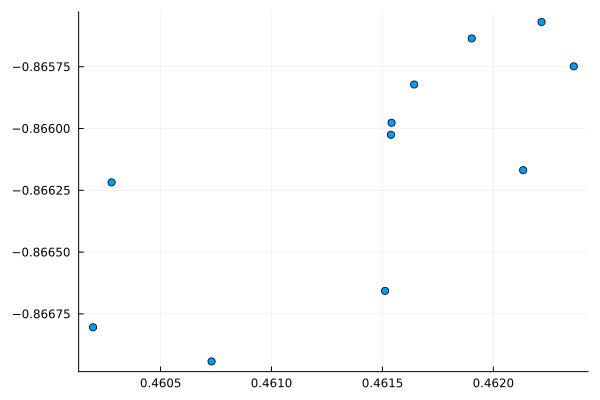

In [4]:
begin
    x = d[:,1]
    y = d[:,2]
    vx = d[:,3]
    vy = d[:,4]
    scatter(x, y, legend=false)
    # scatter!([0], [0], shape=:circle, ms=5)
    # xaxis!("x", (-2.0, 0.5))
    # yaxis!("y", (-1.0, 1.0))
    # title!("Fig. 1")
end

In [5]:
function three_body_restricted_param!(du, u, p, t)
    μ = u[5] 

    x = u[1]
    y = u[2]
    v_x = u[3]
    v_y = u[4]

    du[1] = v_x
    du[2] = v_y
    du[3] = 2*v_y - ((1-μ)*(x + μ))/((x + μ)^2 + y^2)^(3/2) - (μ*(x - 1 + μ))/((x - 1 + μ)^2 + y^2)^(3/2) + x
    du[4] = -2*v_x - ((1-μ)*y)/((x + μ)^2 + y^2)^(3/2) - (μ*y)/((x - 1 + μ)^2 + y^2)^(3/2) + y
    du[5] = 0  # Variando parámetro
end


three_body_restricted_param! (generic function with 1 method)

In [6]:
x0 = 0.4615384615877174
y0 = -0.8660254038298406
vx0 = 0.0
vy0 = 0.0
μ0 =  0.0384 # Valor central de mu cerca de L5

initial_conditions = [x0, y0, vx0, vy0, μ0]


t0 = 0.0
tend = 5.0
step = 1.0
time_vector = t0:step:tend
order = 10
abstol = 1e-12

varorder = 4  
ξ = set_variables("ξ", numvars=5, order=varorder) 


q0TN = initial_conditions .+ ξ

5-element Vector{TaylorN{Float64}}:
    0.4615384615877174 + 1.0 ξ₁ + 𝒪(‖x‖⁵)
  - 0.8660254038298406 + 1.0 ξ₂ + 𝒪(‖x‖⁵)
                         1.0 ξ₃ + 𝒪(‖x‖⁵)
                         1.0 ξ₄ + 𝒪(‖x‖⁵)
                0.0384 + 1.0 ξ₅ + 𝒪(‖x‖⁵)

In [7]:
result = taylorinteg(three_body_restricted_param!, q0TN, time_vector, order, abstol, maxsteps=9000)